# Partie Chaine de Markov (Part 1)
## L. Likforman

Auteurs: Aymeric François & Benjamin Ternot

In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

filename_A='bigramenglish.txt'
A=np.loadtxt(filename_A)
print(f'Taille de `A`: {len(A)}')
filename_F='bigramfrancais.txt'
F=np.loadtxt(filename_F)
print(f'Taille de `F`: {len(F)}')
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' '}
print(f'Taille de `dic`: {len(dic)}')

Taille de `A`: 28
Taille de `F`: 28
Taille de `dic`: 28


## I.2.a 
`bigramenglish.txt` contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.
A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

**Réponse:**

La première ligne correspond aux probabilités pour chaque lettre de débuter un mot, celle de la dernière colonne la probabilité que la lettre soit la dernière lettre d'un mot.

In [2]:
def transitions_frequentes(matrice):
    transitions_frequentes = {}
    for i,value in dic.items():
        j = np.argmax(matrice[int(i)-1,:])
        percent = matrice[int(i)-1][j]
        transitions_frequentes[i] = (dic[str(j+1)], percent)
    return transitions_frequentes

def trans_freq_to_str(matrice):
    string = ""
    trans_freq = transitions_frequentes(matrice)
    for i, val in trans_freq.items():
        letter_j, perc = val
        string += f"'{dic[i]}' -> '{letter_j}' ({perc:.{2 if perc<1 else 1}%})\n"
    return string


In [3]:
print(f'English:\n{trans_freq_to_str(A)}')
print(f'Français:\n{trans_freq_to_str(F)}')

English:
' ' -> 't' (16.45%)
'a' -> 'n' (22.05%)
'b' -> 'e' (28.28%)
'c' -> 'o' (16.69%)
'd' -> ' ' (59.88%)
'e' -> ' ' (36.05%)
'f' -> ' ' (39.65%)
'g' -> ' ' (31.57%)
'h' -> 'e' (46.97%)
'i' -> 'n' (24.53%)
'j' -> 'o' (46.98%)
'k' -> ' ' (37.23%)
'l' -> 'e' (17.09%)
'm' -> 'e' (26.77%)
'n' -> ' ' (29.42%)
'o' -> 'n' (16.04%)
'p' -> 'e' (19.47%)
'q' -> 'u' (96.37%)
'r' -> 'e' (24.48%)
's' -> ' ' (43.03%)
't' -> 'h' (33.94%)
'u' -> 'r' (15.04%)
'v' -> 'e' (61.84%)
'w' -> 'a' (20.32%)
'x' -> 't' (20.06%)
'y' -> ' ' (77.58%)
'z' -> 'e' (55.66%)
' ' -> ' ' (100.0%)

Français:
' ' -> 'd' (20.62%)
'a' -> 'n' (17.75%)
'b' -> 'r' (29.96%)
'c' -> 'e' (30.18%)
'd' -> 'e' (54.66%)
'e' -> ' ' (33.72%)
'f' -> 'i' (26.55%)
'g' -> 'i' (46.21%)
'h' -> 'e' (43.72%)
'i' -> 'c' (14.59%)
'j' -> 'o' (32.26%)
'k' -> 'a' (3.70%)
'l' -> 'e' (28.68%)
'm' -> 'e' (47.08%)
'n' -> ' ' (20.58%)
'o' -> 'n' (30.05%)
'p' -> 'e' (23.83%)
'q' -> 'u' (93.26%)
'r' -> 'e' (30.35%)
's' -> ' ' (62.66%)
't' -> ' ' (28.40%)
'

## I.2.b


La fonction `etat_suivant` génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.
Afficher sur un graphique la fonction de répartition 
pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.



**Réponse:**

La fonction de répartition $f_i:j\mapsto f_i(j)$ donne la probabilité cumulée $f_i(j)$ de transiter de l'état $i$ à un état $j'<j$.

On s'en sert ici en générant un nombre aléatoire `unif` entre 0 et 1, et en regardant la valeur de `j`pour laquelle $f_i(j)$ devient supérieur à `unif`. Cela permet de respecter de manière simple les probabilités de notre matrice de transition.

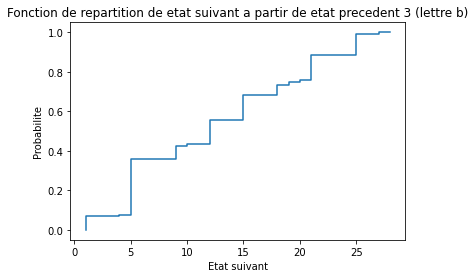

In [4]:
plt.step(range(1, 29), np.cumsum(A[2,]))
#plt.step()
plt.title('Fonction de repartition de etat suivant a partir de etat precedent 3 (lettre b)')
plt.xlabel('Etat suivant')
plt.ylabel('Probabilite') 
plt.show()

In [5]:
def etat_suivant(ligne_matrice_trans):
    '''
    La fonction génère un état (à t+1) à partir de l’état courant (à t) 
    La ligne de la matrice de transitions correspond aux probabilités 
    de transiter de l etat courant vers les autres etats.
    '''
    f_repartition = np.cumsum(ligne_matrice_trans)
    unif = np.random.random()
    stat = 0
    while(unif >= f_repartition[stat]):
        stat = stat+1
    return stat


Ecrire la fonction genere_state_seq 
qui génère une séquence d’états jusqu’à aboutir à l’état final (28). 
Puis ecrire une fonction display_seq qui transforme une séquence d’états 
en séquence de caractères, à l’aide d’un dictionnaire. 
Utiliser ces fonctions pour générer des mots.


In [6]:
def  generate_state_seq(A):
    
    """
    Calculate a sequence of states

    """  
    numStates = len(A)
# Generate the emitting states sequence 
    t = 0  
    stateSeq=[]   

#    a completer
    while t!= numStates-1:
        t = etat_suivant(A[t,:])
        stateSeq.append(t)
    return stateSeq

In [7]:
def display_seq(seq):
    str_seq = ""
    for t in seq:
        str_seq += dic[str(t+1)]
    return str_seq

In [8]:
print('Generation de mots modèle anglais:\n')
for i in range (5) :
    seq = generate_state_seq(A)
    print(display_seq(seq))
print('\n\nGeneration de mots modèle français:\n')
for i in range(5):
    seq = generate_state_seq(F)
    print(display_seq(seq))

Generation de mots modèle anglais:

ichet 
hontsns 
aleryosinoewnis 
er 
fo 


Generation de mots modèle français:

qu 
s 
fs 
sas 
apes 


## I.2.c

On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [9]:
def modifie_mat_dic(A,dic) :
    dic['29']='.'
    A_mod=np.zeros((29,29))
    A_mod[0:28, 0:28] = A[:,:]
    A_mod[27, 0] = 0.9
    A_mod[27, 27:] = 0, 0.1
    return A_mod,dic

In [10]:
Amod,dicmod=modifie_mat_dic(A,dic)
Fmod,dicmod=modifie_mat_dic(F,dic)

In [11]:
def genere_phrase(A,dic) :
    t=0
    numStates=len(dic)
    stateSeq=[]
    # stateSeq est une liste
    while t!= numStates-1:
        t = etat_suivant(A[t,:])
        stateSeq.append(t)
    return stateSeq

In [12]:
print('Generation de phrases modèle anglais:\n')
for i in range (5) :
    state_seq=genere_phrase(Amod,dicmod)
    #print(state_seq)
    print(display_seq(state_seq))
print('\n\nGeneration de phrases modèle français:\n')
for i in range (5) :
    state_seq=genere_phrase(Fmod,dicmod)
    #print(state_seq)
    print(display_seq(state_seq))

Generation de phrases modèle anglais:

pith  thachelellew  inofr  ge  ll  g  d  wasagalialtehe  on  ane  buctra  angestia  itimlirean  s  tlifoull  oferon  in  hichan  s  a .
obrer  tayo  a  wicof  d  f .
ve  ty  ourade  dillich .
ranth  t  futhed  stes .
ld  th  cung  ereave  nd .


Generation de phrases modèle français:

qur  lon  drercoprecri  diec  des  anonontr  s  litans  dens  liquepeus  edu .
pr  donterr  deronetiourens  ancis  ela  dete  lstrioge  s  ece  uit  e  nctrier  l .
syt  autelites  jenoursas  durs  ve  gitin  qume  mes  ansoicens  e  us  an .
dans  duc  pen  a  donfis  mene  bl  len  amestet  routrent  usqus  de  antausaias .
debrmecouiemppoghes  lelicis  aue  e  laces  pre  as  ne  uxprmenueibr  d  uesamplos  an  les .


## I.3


In [13]:
#transformer les espaces en +/- dans le dictionnaire et inversion
dicmodtransf=dicmod.copy()
dicmodtransf['1']='-'
dicmodtransf['28']='+'
dicmodtransf['29']='.'

Charger la matrice des transitions entre caractères pour le français. Ecrire une fonction `calc_vraisemblance` qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.


In [14]:
def calc_vraisemblance(string, dic, mat) : 
    dicInv = {v: k for k, v in dic.items()} 
    vraisemblance = 1.0
    state = dicInv[string[0]]
    for char in string[1:]:
        vraisemblance *= mat[int(state)-1, int(dicInv[char])-1]
        state = dicInv[char]
    return vraisemblance

Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [15]:
for sentence in ["-to+-be+-or+-not+-to+-be+.", "-etre+-ou+-ne+-pas+-etre+."]:
    print(f'Modèle anglais pour "{sentence}": vraissemblance = {calc_vraisemblance(sentence,dicmodtransf,Amod):.2e}')
    print(f'Modèle français pour "{sentence}": vraissemblance = {calc_vraisemblance(sentence,dicmodtransf,Fmod):.2e}')

Modèle anglais pour "-to+-be+-or+-not+-to+-be+.": vraissemblance = 8.11e-20
Modèle français pour "-to+-be+-or+-not+-to+-be+.": vraissemblance = 5.96e-30
Modèle anglais pour "-etre+-ou+-ne+-pas+-etre+.": vraissemblance = 4.46e-24
Modèle français pour "-etre+-ou+-ne+-pas+-etre+.": vraissemblance = 1.15e-19


## II.2

In [16]:
v = np.loadtxt('data_txt_compact\\' + 'matrice_symboles.txt')
A0 = np.loadtxt('data_txt_compact\\' + 'A0.txt')
B0 = np.loadtxt('data_txt_compact\\' + 'B0.txt')
pi0 = np.loadtxt('data_txt_compact\\' + 'vect_pi0.txt')

### II.2.1
* Les zéros de la matrice `B` correspondent aux probabilités nulles pour une observation donnée (en ligne) de correspondre à un état (en colonne).
* Les zéros de la matrice `A` correspondent aux probabilités nulles pour un état q_i (en ligne) de transiter à un état q_j (en colonne).
* Les zéros du vecteur $\pi$ correspondent aux états de probabilité nulles.


### II.2.2
pour la ligne $i$, la fonction de répartition $f_i:j\mapsto f_i(j)$ de la matrice de transition nous donne la probabilité cumulée de passer d'un état $i$ à un état $j'< j$.

In [17]:
def etat_suivant(etat_i, matrice_trans):
    '''
    La fonction génère un état (à t+1) à partir de l’état courant (à t) 
    La ligne de la matrice de transitions correspond aux probabilités 
    de transiter de l etat courant vers les autres etats.
    '''
    f_repartition = np.cumsum(matrice_trans[etat_i])
    unif = np.random.random()
    etat_suivant = 0
    while(unif >= f_repartition[etat_suivant] and etat_suivant<31):
        etat_suivant += 1
    return etat_suivant

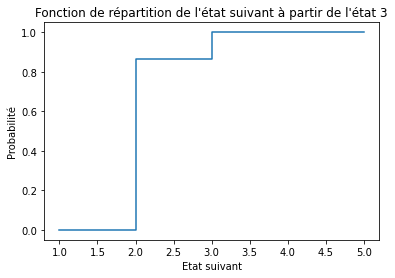

In [18]:
plt.step(range(1, 6), np.cumsum(A0[2,]))
#plt.step()
plt.title('Fonction de répartition de l\'état suivant à partir de l\'état 3')
plt.xlabel('Etat suivant')
plt.ylabel('Probabilité') 
plt.show()

## II.2.3

In [19]:
def  generate_obs_seq(A, B, pi):
    
    """
    Calculate a sequence of states

    """  
    numStates = len(A)
    # Generate the emitting states sequence 
    f_repartition = np.cumsum(pi)
    unif = np.random.random()
    t = 0
    while(unif >= f_repartition[t] and t<4):
        t += 1
    obsSeq=[]
    while t!= numStates-1:
        t = etat_suivant(t, A)
        obsSeq.append(etat_suivant(t, B.T))
    return obsSeq

In [20]:
obs_seq = generate_obs_seq(A0, B0, pi0)
print(obs_seq)

[0, 0, 0, 0, 0, 0, 0, 0, 13, 22, 22, 22, 13, 22, 17, 11, 22, 10, 26, 22, 0]


### II.2.4

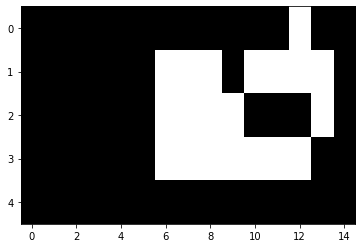

In [21]:
import matplotlib.pyplot as plt
im=[]
obs_seq = generate_obs_seq(A0, B0, pi0)
# les x contiennent les index dans le dictionnaire
for obs in (obs_seq) :
    im_col=v[:, obs]
    im.append(im_col)
im = np.array(im).T # now make an array
plt.imshow(im, cmap='gray', interpolation='none', aspect='auto')
plt.show()

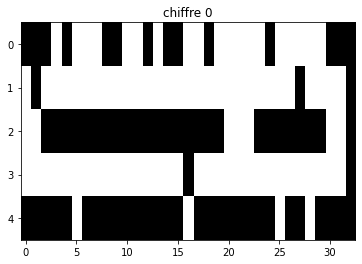

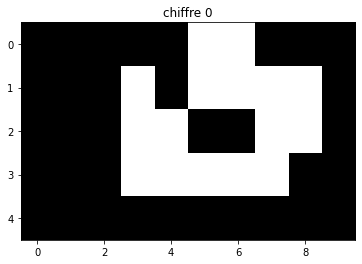

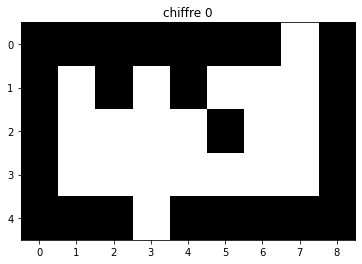

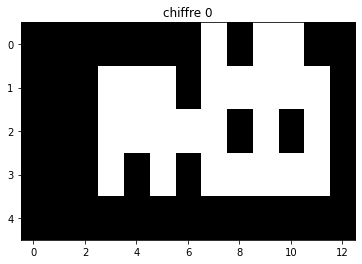

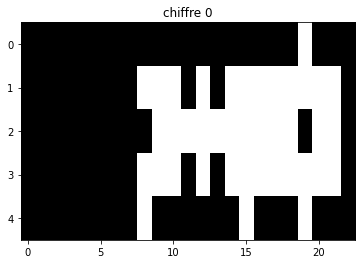

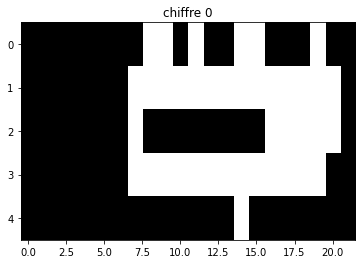

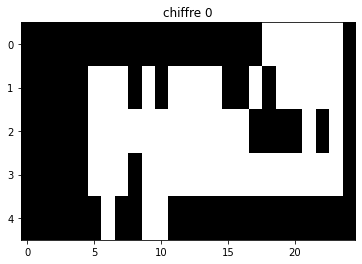

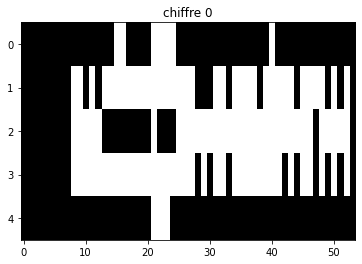

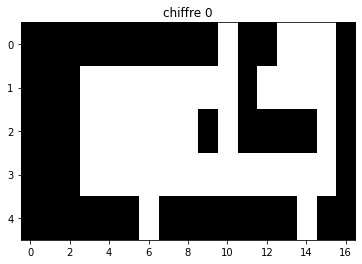

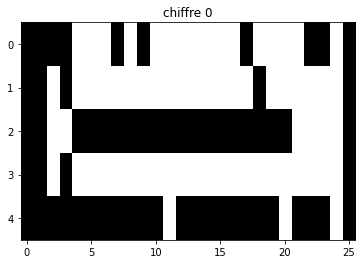

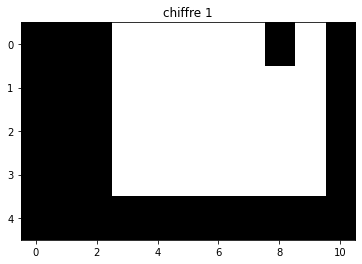

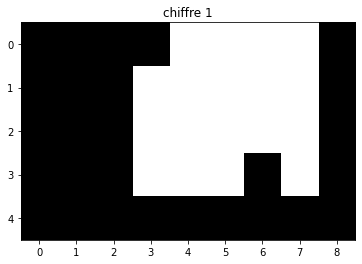

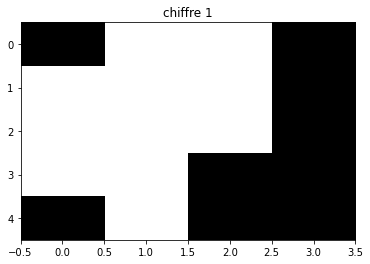

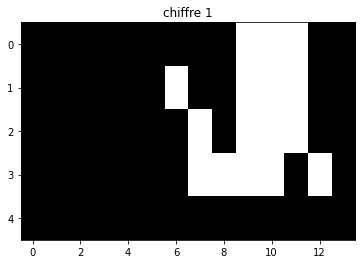

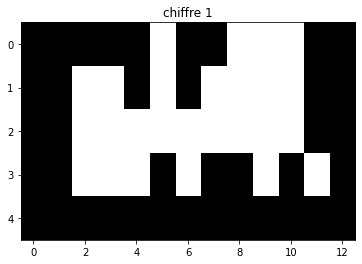

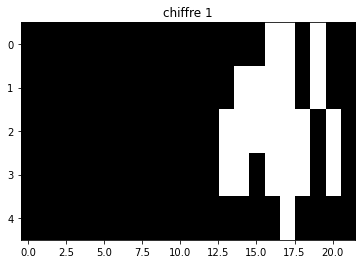

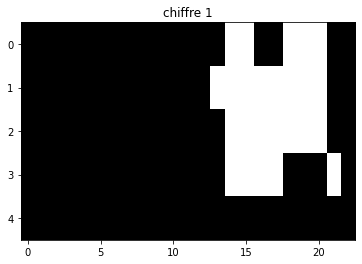

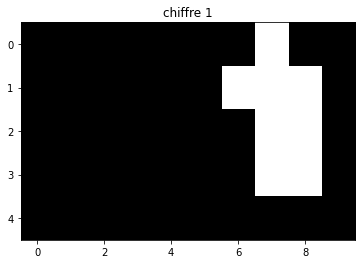

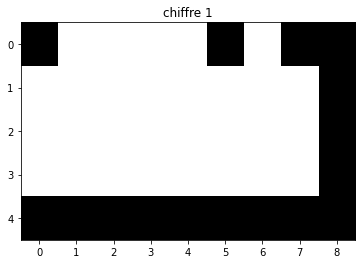

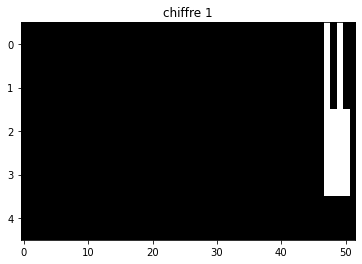

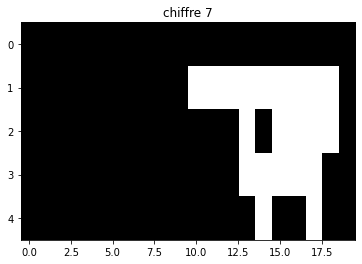

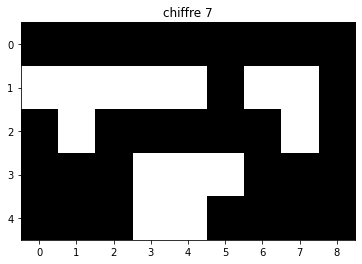

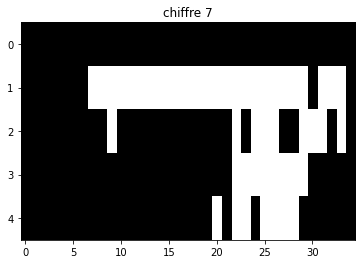

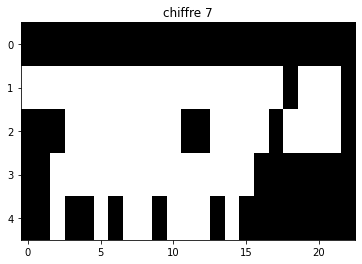

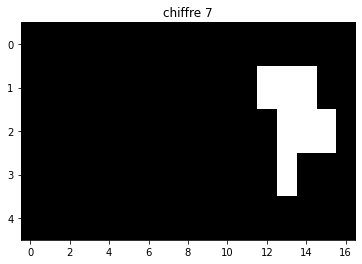

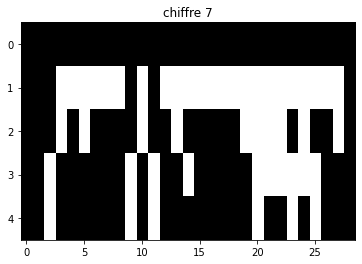

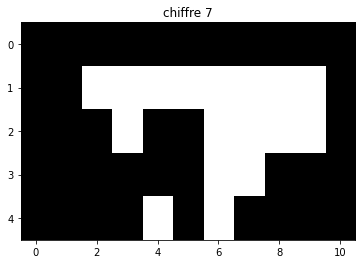

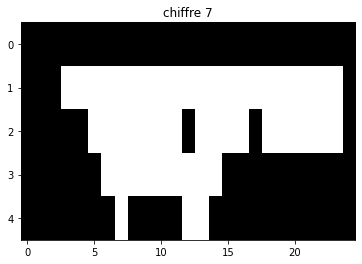

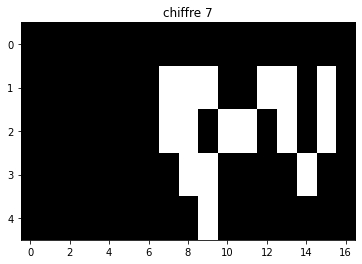

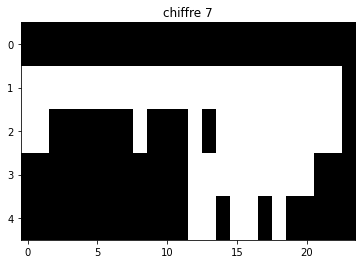

In [22]:
for i in ['0', '1', '7']:
    Ai = np.loadtxt('data_txt_compact\\' + f'A{i}.txt')
    Bi = np.loadtxt('data_txt_compact\\' + f'B{i}.txt')
    pi_i = np.loadtxt('data_txt_compact\\' + f'vect_pi{i}.txt')
    for _ in range(10):
        im=[]
        obs_seq = generate_obs_seq(Ai, Bi, pi_i)
        for obs in (obs_seq):
            im_col=v[:, obs]
            im.append(im_col)
        im = np.array(im).T # now make an array
        plt.imshow(im, cmap='gray', interpolation='none', aspect='auto')
        plt.title(f'chiffre {i}')
        plt.show()

## II.3
### II.3.1

In [23]:
def viterbi_log(seq, A, B, pi):
    etats = range(A.shape[0])
    T = len(seq)
    V = np.zeros((T, A.shape[0]))
    chemin = np.zeros((T,))

    # Initialisation
    V[0] = (A @ B.T)[etats, :].T + seq[0]

    # Récursion
    for t in range(1, T):
        temp = V[t-1] + (A @ B.T)[etats, :].T
        V[t] = np.max(temp, axis=1) + seq[t]
        chemin[t-1] = np.argmax(temp, axis=1)

    # Retour de la séquence la plus probable
    dernier_etat = np.argmax(V[-1])
    sequence_etats = [dernier_etat]
    for t in range(T-2, -1, -1):
        dernier_etat = chemin[t, int(dernier_etat)]
        sequence_etats.insert(0, dernier_etat)

    return sequence_etats